In [2]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda
from keras.layers import Embedding
from keras.layers import Convolution1D,MaxPooling1D, Flatten
from keras.datasets import imdb
from keras import backend as K
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.utils.np_utils import to_categorical

from sklearn.preprocessing import Normalizer
from keras.models import Sequential
from keras.layers import Convolution1D, Dense, Dropout, Flatten, MaxPooling1D
from keras.utils import np_utils
import numpy as np
import h5py
from keras import callbacks
from keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
from keras.callbacks import CSVLogger
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

traindata = pd.read_csv('/home/ritika/NetworkIntrusionDetection/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_training-set.csv')
testdata = pd.read_csv('/home/ritika/NetworkIntrusionDetection/UNSW-NB15 - CSV Files/a part of training and testing set/UNSW_NB15_testing-set.csv')

traindata=traindata.drop('id',axis=1)
testdata=testdata.drop('id',axis=1)

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()

traindata['proto'] = lb_make.fit_transform(traindata['proto'])
traindata['service'] = lb_make.fit_transform(traindata['service'])
traindata['state'] = lb_make.fit_transform(traindata['state'])

testdata['proto'] = lb_make.fit_transform(testdata['proto'])
testdata['service'] = lb_make.fit_transform(testdata['service'])
testdata['state'] = lb_make.fit_transform(testdata['state'])

X = traindata.iloc[:,1:42]
Y = traindata.iloc[:,-1]
x = testdata.iloc[:,1:42]
y = testdata.iloc[:,-1]

In [8]:
Arr = X.values
arr = x.values

import librosa
Arr_Delta = librosa.feature.delta(Arr)
arr_delta = librosa.feature.delta(arr)

Delta1 = pd.DataFrame(Arr_Delta)
delta1 = pd.DataFrame(arr_delta)

XDelta1 = pd.concat([X, Delta1], axis=1)
xdelta1 = pd.concat([x, delta1], axis=1)

scaler = Normalizer().fit(XDelta1)
XDelta1 = scaler.transform(XDelta1)
scaler = Normalizer().fit(xdelta1)
xdelta1 = scaler.transform(xdelta1)

Y = np.array(Y)
y = np.array(y)

XDelta1 = np.reshape(XDelta1, (XDelta1.shape[0],1,XDelta1.shape[1]))
xdelta1 = np.reshape(xdelta1, (xdelta1.shape[0],1,xdelta1.shape[1]))

In [9]:
model = Sequential()
model.add(LSTM(4,input_dim=82))  # try using a GRU instead, for fun
model.add(Dropout(0.1))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/home/ritika/.virtualenvs/pythree/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(4, input_shape=(None, 82))`
  


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 4)                 1392      
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 5         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 1,397
Trainable params: 1,397
Non-trainable params: 0
_________________________________________________________________


In [10]:
history = model.fit(XDelta1, Y, epochs=200, validation_data=(xdelta1, y))


Train on 175341 samples, validate on 82332 samples
Epoch 1/200
175341/175341 [==============================] - 33s 187us/step - loss: 0.4377 - accuracy: 0.7521 - val_loss: 0.5555 - val_accuracy: 0.7132
Epoch 2/200
175341/175341 [==============================] - 31s 178us/step - loss: 0.4061 - accuracy: 0.7689 - val_loss: 0.5570 - val_accuracy: 0.6846
Epoch 3/200
175341/175341 [==============================] - 35s 201us/step - loss: 0.4035 - accuracy: 0.7702 - val_loss: 0.5642 - val_accuracy: 0.6867
Epoch 4/200
175341/175341 [==============================] - 30s 169us/step - loss: 0.4016 - accuracy: 0.7701 - val_loss: 0.5678 - val_accuracy: 0.6871
Epoch 5/200
175341/175341 [==============================] - 33s 188us/step - loss: 0.4003 - accuracy: 0.7711 - val_loss: 0.5502 - val_accuracy: 0.7187
Epoch 6/200
175341/175341 [==============================] - 31s 179us/step - loss: 0.3991 - accuracy: 0.7717 - val_loss: 0.5541 - val_accuracy: 0.6975
Epoch 7/200
175341/175341 [=========

Epoch 53/200
175341/175341 [==============================] - 55s 315us/step - loss: 0.3297 - accuracy: 0.8487 - val_loss: 0.5361 - val_accuracy: 0.7094
Epoch 54/200
175341/175341 [==============================] - 55s 312us/step - loss: 0.3295 - accuracy: 0.8491 - val_loss: 0.5154 - val_accuracy: 0.7128
Epoch 55/200
175341/175341 [==============================] - 54s 306us/step - loss: 0.3291 - accuracy: 0.8494 - val_loss: 0.5101 - val_accuracy: 0.7143
Epoch 56/200
175341/175341 [==============================] - 55s 313us/step - loss: 0.3290 - accuracy: 0.8494 - val_loss: 0.5681 - val_accuracy: 0.7058
Epoch 57/200
175341/175341 [==============================] - 52s 295us/step - loss: 0.3292 - accuracy: 0.8493 - val_loss: 0.5684 - val_accuracy: 0.7049
Epoch 58/200
175341/175341 [==============================] - 54s 310us/step - loss: 0.3288 - accuracy: 0.8499 - val_loss: 0.5317 - val_accuracy: 0.7110
Epoch 59/200
175341/175341 [==============================] - 56s 320us/step - los

175341/175341 [==============================] - 53s 303us/step - loss: 0.3263 - accuracy: 0.8532 - val_loss: 0.5663 - val_accuracy: 0.7071
Epoch 107/200
175341/175341 [==============================] - 52s 296us/step - loss: 0.3255 - accuracy: 0.8540 - val_loss: 0.5000 - val_accuracy: 0.7172
Epoch 108/200
175341/175341 [==============================] - 51s 290us/step - loss: 0.3256 - accuracy: 0.8538 - val_loss: 0.5587 - val_accuracy: 0.7067
Epoch 109/200
175341/175341 [==============================] - 53s 303us/step - loss: 0.3259 - accuracy: 0.8538 - val_loss: 0.5536 - val_accuracy: 0.7075
Epoch 110/200
175341/175341 [==============================] - 52s 299us/step - loss: 0.3265 - accuracy: 0.8537 - val_loss: 0.5467 - val_accuracy: 0.7118
Epoch 111/200
175341/175341 [==============================] - 50s 284us/step - loss: 0.3257 - accuracy: 0.8537 - val_loss: 0.5384 - val_accuracy: 0.7124
Epoch 112/200
175341/175341 [==============================] - 50s 288us/step - loss: 0.32

175341/175341 [==============================] - 50s 284us/step - loss: 0.3223 - accuracy: 0.8569 - val_loss: 0.5369 - val_accuracy: 0.7119
Epoch 160/200
175341/175341 [==============================] - 47s 265us/step - loss: 0.3224 - accuracy: 0.8561 - val_loss: 0.5422 - val_accuracy: 0.7114
Epoch 161/200
175341/175341 [==============================] - 49s 277us/step - loss: 0.3219 - accuracy: 0.8559 - val_loss: 0.5602 - val_accuracy: 0.7081
Epoch 162/200
175341/175341 [==============================] - 51s 291us/step - loss: 0.3218 - accuracy: 0.8565 - val_loss: 0.5343 - val_accuracy: 0.7143
Epoch 163/200
175341/175341 [==============================] - 45s 258us/step - loss: 0.3220 - accuracy: 0.8567 - val_loss: 0.5398 - val_accuracy: 0.7127
Epoch 164/200
175341/175341 [==============================] - 47s 269us/step - loss: 0.3218 - accuracy: 0.8569 - val_loss: 0.5404 - val_accuracy: 0.7128
Epoch 165/200
175341/175341 [==============================] - 48s 275us/step - loss: 0.32

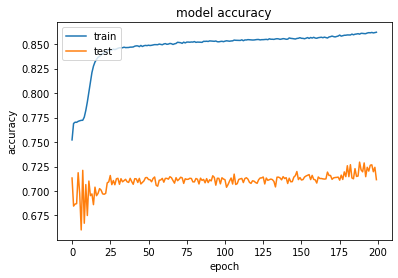

In [11]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Word2Vec300+10epochs+Accuracy+0,1.png')
plt.show()

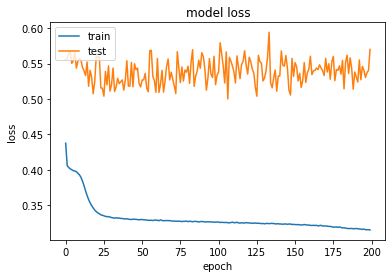

In [12]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Word2Vec300+10epochs+Loss+0,1.png')
plt.show()

In [13]:
from sklearn.metrics import accuracy_score,classification_report
predictions = model.predict([xdelta1])
predictions = [0 if i<0.5 else 1 for i in predictions]
print("Accuracy: ",accuracy_score(y,predictions))
from sklearn.metrics import confusion_matrix

print("Classification Report: \n",classification_report(y,predictions))
conmat = np.array(confusion_matrix(y, predictions, labels=[0,1]))
confusion = pd.DataFrame(conmat, index=['negative', 'positive'],
                         columns=['predicted_negative','predicted_positive'])
print (confusion)

Accuracy:  0.7115823738036243
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.37      0.54     37000
           1       0.66      0.99      0.79     45332

    accuracy                           0.71     82332
   macro avg       0.81      0.68      0.66     82332
weighted avg       0.80      0.71      0.68     82332

          predicted_negative  predicted_positive
negative               13751               23249
positive                 497               44835
